In [1]:
import pandas as pd

In [2]:
airlines=pd.read_csv("C:/Users/elcot/Downloads/Airlines+Data.csv")

In [3]:
airlines.head()

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121


In [4]:
month =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 

In [5]:
import numpy as np

In [6]:
p = airlines["Month"][0]

In [7]:
p[0:3]

'Jan'

In [8]:
airlines['months']= 0

In [9]:
for i in range(96):
    p =airlines ["Month"][i]
    airlines['months'][i]= p[0:3]

C:\Users\elcot\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\elcot\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [10]:
month_dummies = pd.DataFrame(pd.get_dummies(airlines['months']))

In [11]:
airlines1 = pd.concat([airlines,month_dummies],axis = 1)

In [12]:
airlines1["t"] = np.arange(1,97)

In [13]:
airlines1["t_squared"] = airlines1["t"]*airlines1["t"]

In [14]:
airlines1.columns

Index(['Month', 'Passengers', 'months', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan',
       'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 't', 't_squared'],
      dtype='object')

In [15]:
airlines1["log_Passengers"] = np.log(airlines1["Passengers"])

In [16]:
airlines1.rename(columns={"Passengers ": 'Passengers'}, inplace=True)

In [17]:
import matplotlib.pyplot as plot

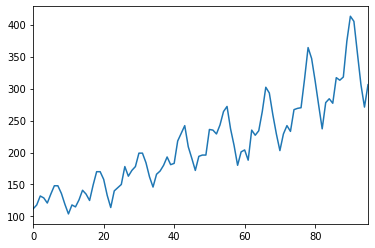

In [18]:
airlines1.Passengers.plot()

In [19]:
airlines1.shape

(96, 18)

In [20]:
Train = airlines1.head(86)

In [21]:
Test = airlines1.tail(10)

In [22]:
Test

,Month,Passengers,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passengers
86,Mar-02,317,Mar,0,0,0,0,0,0,0,1,0,0,0,0,87,7569,5.758902
87,Apr-02,313,Apr,1,0,0,0,0,0,0,0,0,0,0,0,88,7744,5.746203
88,May-02,318,May,0,0,0,0,0,0,0,0,1,0,0,0,89,7921,5.762051
89,Jun-02,374,Jun,0,0,0,0,0,0,1,0,0,0,0,0,90,8100,5.924256
90,Jul-02,413,Jul,0,0,0,0,0,1,0,0,0,0,0,0,91,8281,6.023448
91,Aug-02,405,Aug,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,Sep-02,355,Sep,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,Oct-02,306,Oct,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585
94,Nov-02,271,Nov,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119
95,Dec-02,306,Dec,0,0,1,0,0,0,0,0,0,0,0,0,96,9216,5.723585


In [23]:
import seaborn as sb

In [24]:
# L I N E A R
import statsmodels.formula.api as smf 

In [25]:
linear_model = smf.ols('Passengers~t',data=Train).fit()

In [26]:
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))

In [27]:
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))

In [28]:
rmse_linear

58.64314972778253

In [29]:
Exp = smf.ols('log_Passengers~t',data=Train).fit()

In [30]:
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))

In [31]:
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))

In [32]:
rmse_Exp

49.90312334789298

In [33]:
Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()

In [34]:
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))

In [35]:
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))

In [36]:
rmse_Quad

53.91436357852917

In [37]:
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()

In [38]:
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))

In [39]:
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))

In [40]:
rmse_add_sea

136.79010436819325

In [41]:
add_sea_Quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()

In [42]:
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_squared']]))

In [43]:
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))

In [44]:
rmse_add_sea_quad 

29.10454989923927

In [45]:
Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()

In [46]:
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))

In [47]:
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))

In [48]:
rmse_Mult_sea

144.38493549461418

In [49]:
Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()

In [50]:
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))

In [51]:
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))

In [52]:
rmse_Mult_add_sea

11.264958330315336

In [53]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}

In [54]:
table_rmse=pd.DataFrame(data)

In [55]:
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,58.643150
1,rmse_Exp,49.903123
2,rmse_Quad,53.914364
3,rmse_add_sea,136.790104
4,rmse_add_sea_quad,29.104550
5,rmse_Mult_sea,144.384935
6,rmse_Mult_add_sea,11.264958
